# 推导过程

### 1. 用向量形式推导线性回归

线性回归的目标是通过最小化损失函数 $ L(w) $ 来找到最优的权重 $ w $。我们用向量化的方式推导整个过程。

#### 1.1 问题定义
假设我们有 $ m $ 个样本，每个样本有 $ n $ 个特征。定义：
- 输入矩阵 $ X \in \mathbb{R}^{m \times n} $：每行是一个样本的特征向量。
- 输出向量 $ y \in \mathbb{R}^m $：每个样本的真实值。
- 权重向量 $ w \in \mathbb{R}^n $：模型的参数。
- 偏置 $ b \in \mathbb{R} $：模型的偏置项。

线性回归的预测公式为：
$$
\hat{y} = Xw + b
$$
其中，$ \hat{y} \in \mathbb{R}^m $ 是预测值。

#### 1.2 损失函数
我们使用均方误差（MSE）作为损失函数：
$$
L(w, b) = \frac{1}{2m} \| \hat{y} - y \|^2 = \frac{1}{2m} \| Xw + b - y \|^2
$$

#### 1.3 损失函数的梯度
为了最小化损失函数，我们需要对 $ w $ 和 $ b $ 求偏导。

##### 对 $ w $ 求偏导
展开损失函数：
$$
L(w, b) = \frac{1}{2m} (Xw + b - y)^\top (Xw + b - y)
$$
对 $ w $ 求偏导：
$$
\frac{\partial L(w, b)}{\partial w} = \frac{1}{m} X^\top (Xw + b - y)
$$

对 $ b $ 求偏导：
$$
\frac{\partial L(w, b)}{\partial b} = \frac{1}{m} \sum_{i=1}^m \left( \hat{y}_i - y_i \right) = \frac{1}{m} \mathbf{1}^\top (Xw + b - y)
$$
其中，$ \mathbf{1} $ 是全为 1 的列向量。

#### 1.4 梯度下降更新公式

使用梯度下降法更新 $ w $ 和 $ b $：
$$
w := w - \alpha \frac{\partial L(w, b)}{\partial w}
$$

$$
b := b - \alpha \frac{\partial L(w, b)}{\partial b}
$$
其中，$ \alpha $ 是学习率。

# Python实现现性回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 生成数据
np.random.seed(42)
m, n = 100, 2  # 样本数和特征数
X = np.random.rand(m, n)  # 随机生成特征矩阵
true_w = np.array([2, -3])  # 真实权重
true_b = 5  # 真实偏置
y = np.dot(X,true_w) + true_b

Epoch 0, Loss: 10.6976
Epoch 100, Loss: 0.2104
Epoch 200, Loss: 0.0585
Epoch 300, Loss: 0.0176
Epoch 400, Loss: 0.0055
Epoch 500, Loss: 0.0018
Epoch 600, Loss: 0.0006
Epoch 700, Loss: 0.0002
Epoch 800, Loss: 0.0001
Epoch 900, Loss: 0.0000
Final weights: [ 2.0072425 -2.9891287]
Final bias: 4.990712593230413


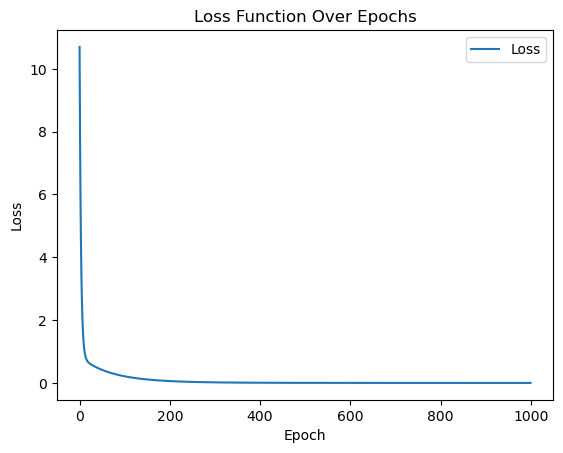

In [6]:
# 初始化参数
w = np.zeros(n)  # 初始化权重
b = 0  # 初始化偏置
alpha = 0.1  # 学习率
epochs = 1000  # 迭代次数

loss_history = []  # 用于存储每次迭代的损失值

for epoch in range(epochs):
    # 预测值
    y_pred = np.dot(X, w) + b
    
    # 计算梯度
    dw = (1 / m) * np.dot(X.T,(y_pred - y))
    db = (1 / m) * np.sum(y_pred - y)

    # 更新参数
    w -= alpha * dw
    b -= alpha * db

    # 记录损失
    loss = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
    loss_history.append(loss)
    
    # 打印损失
    if epoch % 100 == 0:
        loss = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# 打印最终结果
print("Final weights:", w)
print("Final bias:", b)
# 绘制损失函数变化曲线
plt.plot(range(epochs), loss_history, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Function Over Epochs")
plt.legend()
plt.show()